<h1 align="center"> CSEN 1022 Assignment Submission </h1> 

## Please don't forget to fill in this data
Member 1 Name: Philip Mouris

Member 1 ID: 40-1493

Member 1 Tutorial: 10

Member 2 Name: Farah Hazem

Member 2 ID: 40-3192

Member 2 Tutorial: 7

## Imports (Don't Edit)

In [12]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data (Don't Edit)

In [13]:
# Read Training Images, Testing Images, Training Labels, Testing Labels
train = np.array([plt.imread('Data/Train/'+str(i)+'.jpg').reshape(-1) for i in range (1,2401)])
test = np.array([plt.imread('Data/Test/'+str(i)+'.jpg').reshape(-1) for i in range (1,201)])
train_labels = np.loadtxt('Data/Train/Training Labels.txt')
test_labels = np.loadtxt('Data/Test/Test Labels.txt')
print(train.shape, test.shape)
print(train_labels.shape,test_labels.shape)

(2400, 784) (200, 784)
(2400,) (200,)


## Quantize Images

In [14]:
def quantize(data, level):
  digitized_data = []
  for i in range(len(data)):
    digitized_data.append(np.digitize(data[i], [*range(0, 256, 256//level)][1:]))
  return np.array(digitized_data)

train_quantized_2 = quantize(train, 2)
train_quantized_4 = quantize(train, 4)
train_quantized_8 = quantize(train, 8)
train_quantized_16 = quantize(train, 16)
train_quantized_32 = quantize(train, 32)
train_quantized_64 = quantize(train, 64)
train_quantized_128 = quantize(train, 128)
train_quantized_256 = quantize(train, 256)

test_quantized_2 = quantize(test, 2)
test_quantized_4 = quantize(test, 4)
test_quantized_8 = quantize(test, 8)
test_quantized_16 = quantize(test, 16)
test_quantized_32 = quantize(test, 32)
test_quantized_64 = quantize(test, 64)
test_quantized_128 = quantize(test, 128)
test_quantized_256 = quantize(test, 256)

train_quantized = [train_quantized_2, train_quantized_4, train_quantized_8, train_quantized_16, train_quantized_32, train_quantized_64, train_quantized_128, train_quantized_256]
test_quantized = [test_quantized_2, test_quantized_4, test_quantized_8, test_quantized_16, test_quantized_32, test_quantized_64, test_quantized_128, test_quantized_256]

## Compute Naive Bayes

In [15]:
list_of_confusion_matrices = []
list_of_accuracies = []

for level in range(len(train_quantized)):
  predictions = []
  probabilities = []
  for image in test_quantized[level]:
    for c in range(10):
      probabilities.append(np.prod([np.count_nonzero(train_quantized[level][c*240:(c+1)*240][:,feature] == image[feature], axis = 0)/240.0 for feature in range(len(image))]) * 0.1)
    predictions.append(np.argmax(probabilities))
    probabilities = []
  confusion_matrix = np.zeros((10, 10))
  for i in range(0, len(predictions)):
    confusion_matrix[int(test_labels[i]), int(predictions[i])] += 1
  accuracy = ((np.sum(np.diag(confusion_matrix)))/test.shape[0]) * 100
  list_of_confusion_matrices.append(confusion_matrix)
  list_of_accuracies.append(accuracy)


## Plot confusion matrices and accuracy for each quantization level (Don't edit)

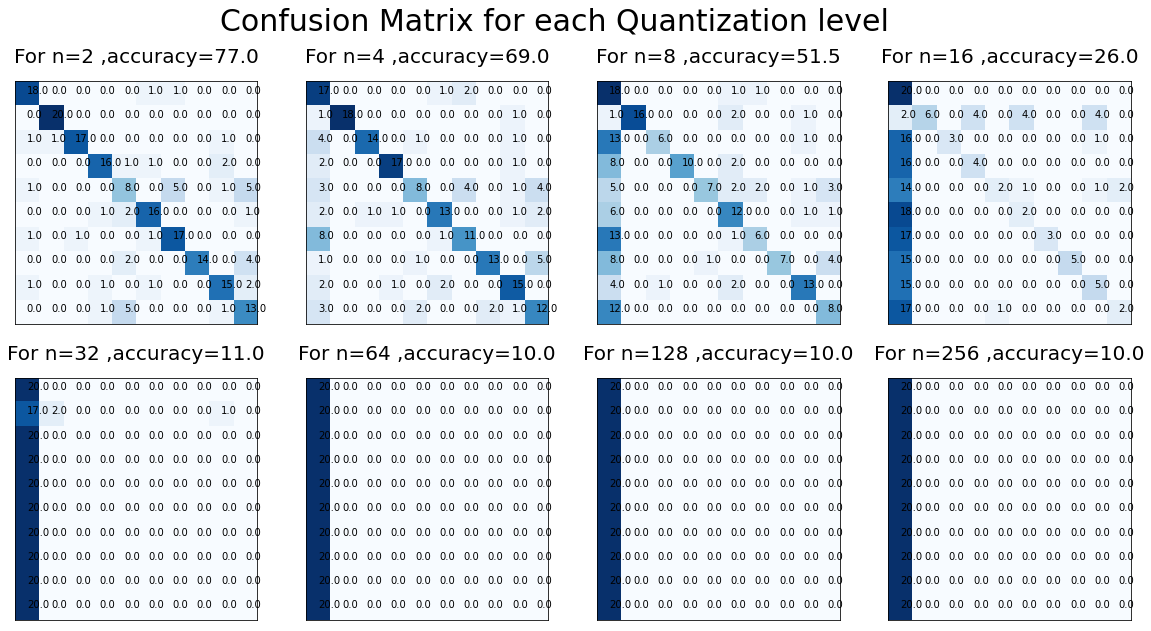

In [16]:
# PLEASE DON'T EDIT THIS CELL
bits = [2,4,8,16,32,64,128,256]
confusion_matrices = list_of_confusion_matrices
accuracies = list_of_accuracies

fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Quantization level",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))
                axs[pi,pj].set_title("For n="+str(bits[index])+" ,accuracy="+str(accuracies[index]),fontsize=20)

## Plot accuracy levels for each quantization level (Don't edit)

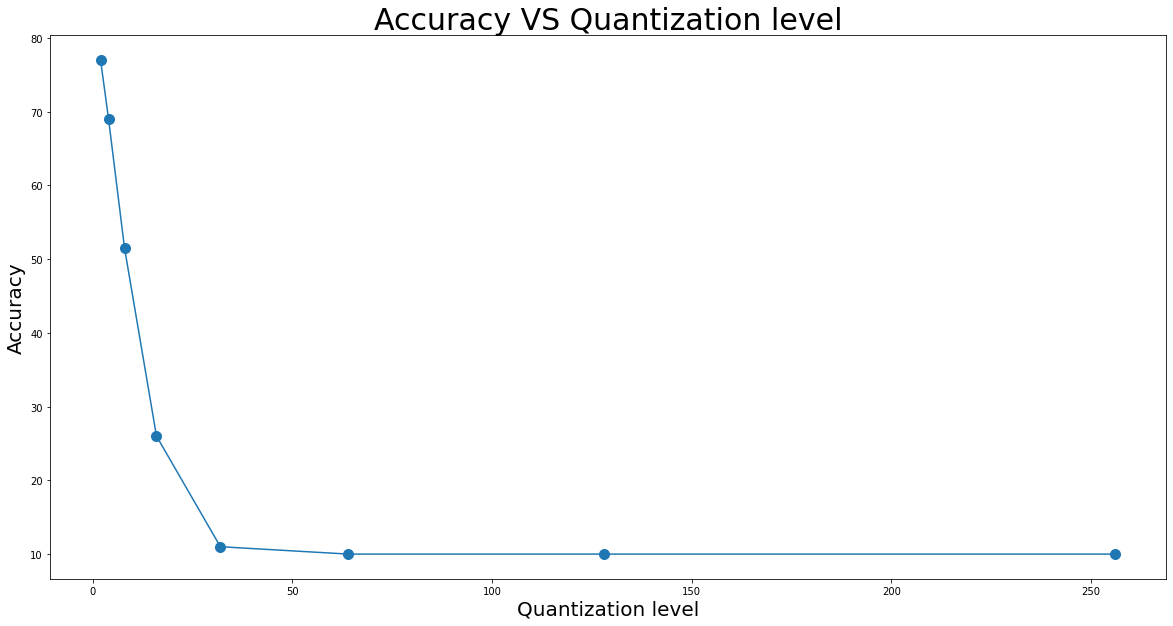

In [17]:
# PLEASE DON'T EDIT THIS CELL
plt.rc('figure', figsize=[20,10])
plt.title("Accuracy VS Quantization level",fontsize=30)
plt.xlabel("Quantization level",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.plot(bits,accuracies,marker='o',markersize=10)

---

## Compute Naive Bayes (replace probabilities of 0 with value in assignment)

In [18]:
list_of_confusion_matrices = []
list_of_accuracies = []

for level in range(len(train_quantized)):
  predictions = []
  probabilities = []
  for image in test_quantized[level]:
    for c in range(10):
      probability = np.prod([(np.count_nonzero(train_quantized[level][c*240:(c+1)*240][:,feature] == image[feature], axis = 0)/240.0) or 0.00001 for feature in range(len(image))]) * 0.1
      probabilities.append(probability)
    predictions.append(np.argmax(probabilities))
    probabilities = []
  confusion_matrix = np.zeros((10, 10))
  for i in range(0, len(predictions)):
    confusion_matrix[int(test_labels[i]), int(predictions[i])] += 1
  accuracy = ((np.sum(np.diag(confusion_matrix)))/test.shape[0]) * 100
  list_of_confusion_matrices.append(confusion_matrix)
  list_of_accuracies.append(accuracy)


## Plot confusion matrices and accuracy for each quantization level (Don't edit)

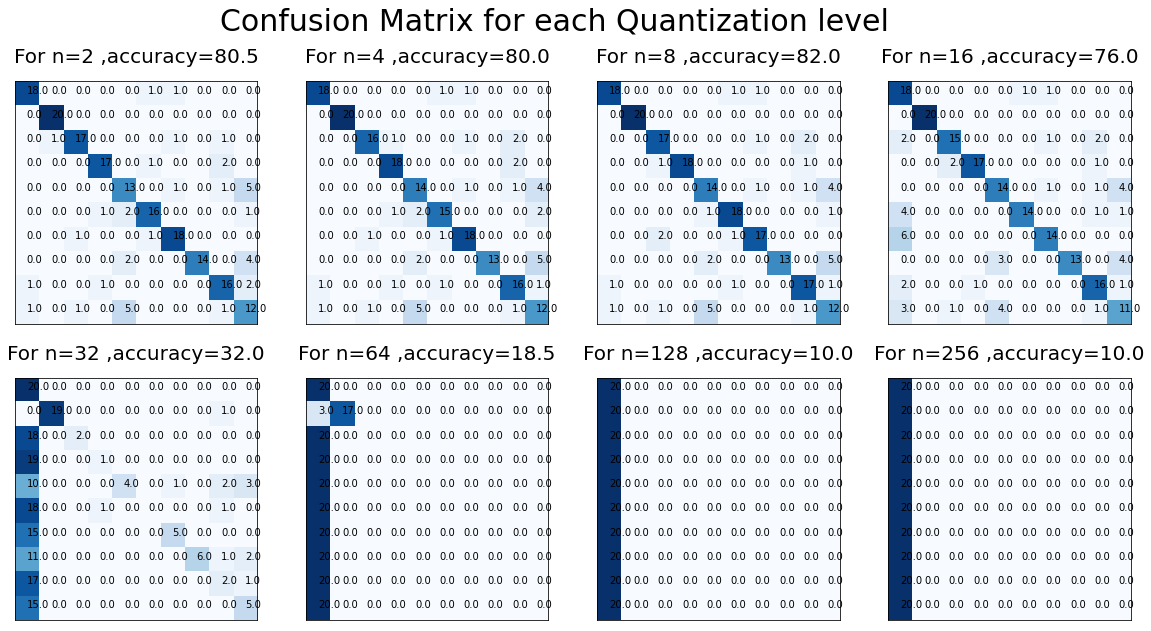

In [19]:
# PLEASE DON'T EDIT THIS CELL
bits = [2,4,8,16,32,64,128,256]
confusion_matrices = list_of_confusion_matrices
accuracies = list_of_accuracies

fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Quantization level",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))
                axs[pi,pj].set_title("For n="+str(bits[index])+" ,accuracy="+str(accuracies[index]),fontsize=20)

## Plot accuracy levels for each quantization level (Don't edit)

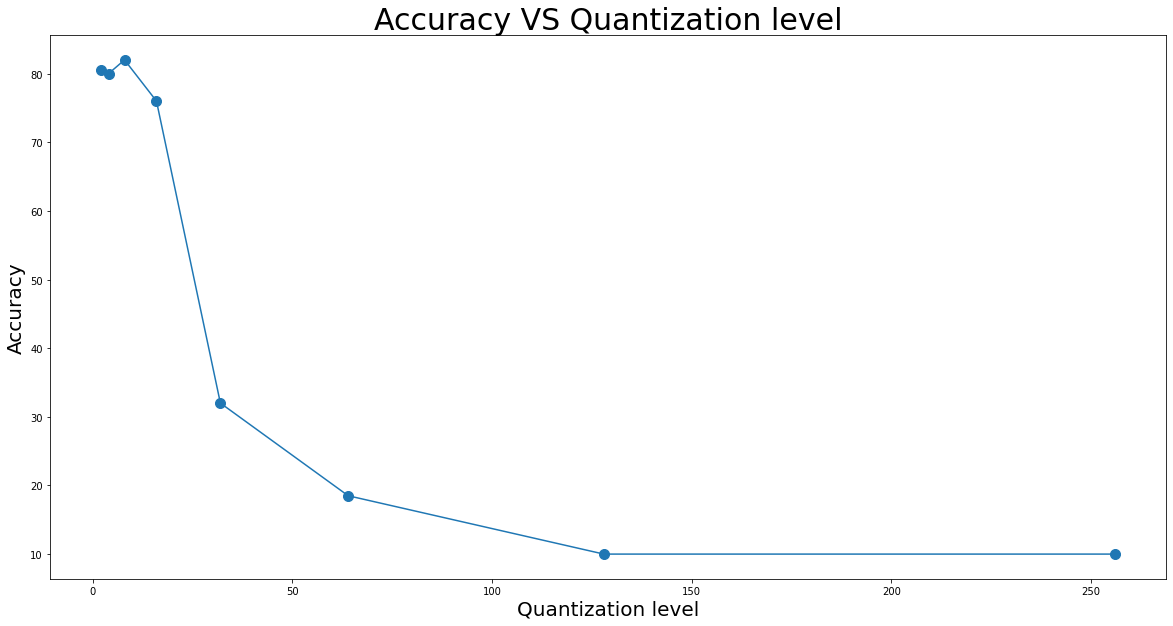

In [20]:
# PLEASE DON'T EDIT THIS CELL
plt.rc('figure', figsize=[20,10])
plt.title("Accuracy VS Quantization level",fontsize=30)
plt.xlabel("Quantization level",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.plot(bits,accuracies,marker='o',markersize=10)

# **Comment**

As we can observe from all the above figures, as the quantization level increases, the accuracy decreases. This is because as the quantization level increases, the number of values that can be assigned to each feature (pixel) increases, which leads to lower probabilities for each feature value, leading to lower probabilities for each class, leading to lower accuracy.